<h1> <span style="color:aqua"><strong>Goal Of This Project </strong> </span></h1>

<p style="font-size: 15px;">I intend to create a <span style="color:red"><strong>two-layer neural network</strong> </span> (excluding the input layer) by <span style="color:red"><strong>initializing random weights and biases</strong> </span>. This project, featuring <span style="color:red"><strong>a network with 10 neurons</strong> </span> in each layer and designed for inputs of 784 features (typical for 28x28 pixel images like those in the MNIST dataset), aims to enhance my understanding of the intricacies of neural networks. A significant aspect of this endeavor is to <span style="color:red"><strong>specifically delve into the concept of backpropagation </strong> </span>, deepening my knowledge of how neural networks learn and adapt.</p>

In [204]:
import numpy as np
import pandas as pd
from matplotlib import pyplot


In [205]:
data = pd.read_csv('train.csv')
data.shape

(42000, 785)

Understanding Data:
Dataset consists of hand drawn images starting from 1-9 where each image is 28*28 pixels.

col = each pixel (totaling 784 rows)
row = each example image totaling 42000

In [206]:
data.iloc[0:,1:]


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h1><span style="color:aqua"><strong>Understanding Data</strong> </span></h1> 

<p> <span style="color:red"><strong>Row</strong></span> = 42000.Each row representing a single image of a hand drawn number</p>
<p> <span style="color:red"><strong>Columns</strong></span> = 785. Each column representing a single pixel intensity value (excluding label columns) </p>

<div>
</div>

<p style="font-size: 30px;"> <span style="color:aqua"><strong>Deeper understanding</strong> </span></p> 

<p> <strong> 784 </strong> represents the amount of <strong>columns</strong> that exist per row.<span style="color:red"><strong> Each row signifies an example image from 0-9 </strong></span>while each column containing values of <em> either 0 or 1 </em> represents the <strong> grayscale values of the flattened 28*28 pixel image </strong> </p>





<p style="font-size: 20px;"> <span style="color:aqua"><strong>What does our data actually look like?</strong> </span></p> 
<p style="font-size:15px;"><span style="color:red"><strong>Steps</strong> </span></p> </p>
<ol>
    <li>Grab a row </li>
    <li>Convert to numpy </li>
    <li>Refactor it to its orginal size (I know original size was 28*28 per MNIST doc)</li>
    <li>Plot the pixels using matplot </li>

</ol>

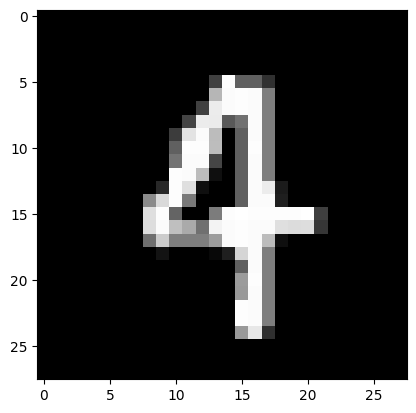

In [207]:
#Lets take an example row and see what it looks like.
example_one = data.iloc[3001, 1:]
example_two = example_one.to_numpy()
example_one = example_two.reshape(28,28)
# print('Matrix representation of row', example_one)


pyplot.imshow(example_one, cmap = 'gray')

<h1> <span style="color:aqua"><strong>Dividing Our Data</strong> </span></h1>


In [208]:
data = np.array(data)
total_rows, total_cols = data.shape #Keep these constant will be reused and referenced throughout transposed matrices
np.random.shuffle(data)
print(total_rows,total_cols) #(m,n)

42000 785


In [209]:
#Transposing first 1000 example images so now each column is an example image with each row of the column referencing 1/784 pixels
data_dev = data[0:1000].T
image_label_dev = data_dev[0] #Y_dev First row of this matrix represents image labels.
intensity_value_dev = data_dev[1:total_cols]  #X_dev First 
print(total_rows,total_cols)


42000 785


In [210]:
# data_train = data[1000:total_rows].T
# Y_train = data_train[0]
# X_train = data_train[1:total_cols]


data_train = data[1000:total_rows].T
image_label_train = data_train[0] #y_train
intensity_value_train = data_train[1:total_cols] #X_train



In [211]:
intensity_value_train[:,1].shape #all rows(pixel intensity value) from the first colum(first image in dataset) shape

(784,)

<h1> <span style="color:aqua"><strong>Begin Forward Propagation</strong> </span></h1>


In [212]:
def init_params(): 
    W1 = np.random.rand(10, 784) - 0.5 #W1 = matrix of size rows = 10, cols = 784 containing uniform distributed floats from [0,1) -.5
    b1 = np.random.rand(10, 1) - 0.5 #matrix of size rows = 10, cols = 1 containing uniform distributed floats from [0,1) -.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

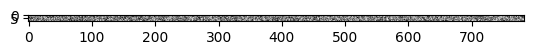

In [228]:

W1 = np.random.rand(10, 784) - 0.5
b1 = np.random.rand(10, 1) - 0.5
W2 = np.random.rand(10, 10) - 0.5
b2 = np.random.rand(10, 1) - 0.5


pyplot.imshow(W1, cmap='grey')


In [9]:
def ReLU(Z):
    if Z > 0:
        return Z
    else:
        return 0

In [10]:
def soft_max(Z):
    return np.exp(Z)/np.sum(np.exp(Z))

In [11]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = soft_max(Z2)
    return Z1, A1, Z2, A2



In [12]:
def one_hot_encoding(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    #Y.size = m = #of examples, assumes classes are 1-9 and we get 9+1 so 10 classes
    one_hot_Y[np.arrange(Y.size), Y] = 1
    #creates a range from 0 - m for each label so which colum it should set to 1 
    one_hot_Y = one_hot_Y.T
    #flip it because rn every row is an example we want columns 
    return one_hot_Y

In [13]:
def deriv_ReLU(Z):
    return Z > 0

In [14]:
def back_prop(Z1, A1, Z2, A2, W2, X, Y):
    m = Y.size()
    one_hot_y = one_hot_encoding(Y)
    dZ2 = A2 - one_hot_y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, 2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ2, 2)
    return dW1, db1, dW2, db2

In [15]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1 
    b1 = b1 - alpha * db1 
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2
    

In [ ]:


def gradient_descent